In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors  
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
tfidf_matrix = pd.read_csv('tfidf_matrix.csv')
tfidf_matrix

,DiscountPrice,OriginalPrice,DiscountOffer,pca_brandname_0,pca_brandname_1,pca_brandname_2,pca_brandname_3,pca_brandname_4,pca_brandname_5,pca_brandname_6,...,pca_individual_category_18,pca_individual_category_19,Category_Indian Wear,Category_Inner Wear & Sleep Wear,Category_Lingerie & Sleep Wear,Category_Plus Size,Category_Sports Wear,Category_Topwear,Category_Western,category_by_Gender_Women
0,324.0,1299.0,75.0,-0.076477,-0.094640,-0.200341,0.934253,0.166078,0.043500,0.034887,...,-0.003831,-0.003446,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1559.0,2399.0,35.0,-0.047953,-0.036005,-0.047985,-0.046413,-0.062067,-0.061202,-0.092845,...,-0.005118,-0.004585,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,399.0,799.0,50.0,-0.033569,-0.021034,-0.025610,-0.021041,-0.024074,-0.016253,-0.017834,...,-0.016033,-0.013911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1264.0,2299.0,45.0,-0.067500,-0.069379,-0.117166,-0.250873,0.932096,0.070445,0.050385,...,-0.016033,-0.013911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,849.0,999.0,15.0,-0.038227,-0.025310,-0.031593,-0.027050,-0.032042,-0.023109,-0.026458,...,0.034426,0.034708,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94027,1259.0,1799.0,30.0,-0.033238,-0.020748,-0.025219,-0.020665,-0.023594,-0.015866,-0.017368,...,-0.005118,-0.004585,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
94028,479.0,2178.0,78.0,-0.032215,-0.019876,-0.024040,-0.019544,-0.022173,-0.014737,-0.016021,...,-0.010445,-0.009211,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
94029,489.0,699.0,30.0,-0.032480,-0.020100,-0.024341,-0.019829,-0.022532,-0.015020,-0.016357,...,-0.029704,-0.024784,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
94030,1291.0,3149.0,59.0,-0.039855,-0.026920,-0.033930,-0.029528,-0.035501,-0.026498,-0.030992,...,-0.005143,-0.004607,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [41]:
tfidf_matrix.shape

(94032, 51)

In [3]:
tfidf_matrix.columns

Index(['DiscountPrice', 'OriginalPrice', 'DiscountOffer', 'pca_brandname_0',
       'pca_brandname_1', 'pca_brandname_2', 'pca_brandname_3',
       'pca_brandname_4', 'pca_brandname_5', 'pca_brandname_6',
       'pca_brandname_7', 'pca_brandname_8', 'pca_brandname_9',
       'pca_brandname_10', 'pca_brandname_11', 'pca_brandname_12',
       'pca_brandname_13', 'pca_brandname_14', 'pca_brandname_15',
       'pca_brandname_16', 'pca_brandname_17', 'pca_brandname_18',
       'pca_brandname_19', 'pca_individual_category_0',
       'pca_individual_category_1', 'pca_individual_category_2',
       'pca_individual_category_3', 'pca_individual_category_4',
       'pca_individual_category_5', 'pca_individual_category_6',
       'pca_individual_category_7', 'pca_individual_category_8',
       'pca_individual_category_9', 'pca_individual_category_10',
       'pca_individual_category_11', 'pca_individual_category_12',
       'pca_individual_category_13', 'pca_individual_category_14',
       'pca_in

In [52]:
numerical_features = ['DiscountPrice', 'OriginalPrice', 'DiscountOffer']
tfidf_matrix[numerical_features].describe()

,DiscountPrice,OriginalPrice,DiscountOffer
count,94032.000000,94032.000000,94032.000000
mean,1030.998501,2223.046689,78.376616
std,748.279230,1563.846859,294.629738
min,127.000000,129.000000,1.000000
25%,584.000000,1299.000000,40.000000
50%,824.000000,1899.000000,55.000000
75%,1259.000000,2599.000000,65.000000
max,16000.000000,36500.000000,19696.000000


In [53]:
tfidf_matrix.shape

(94032, 51)

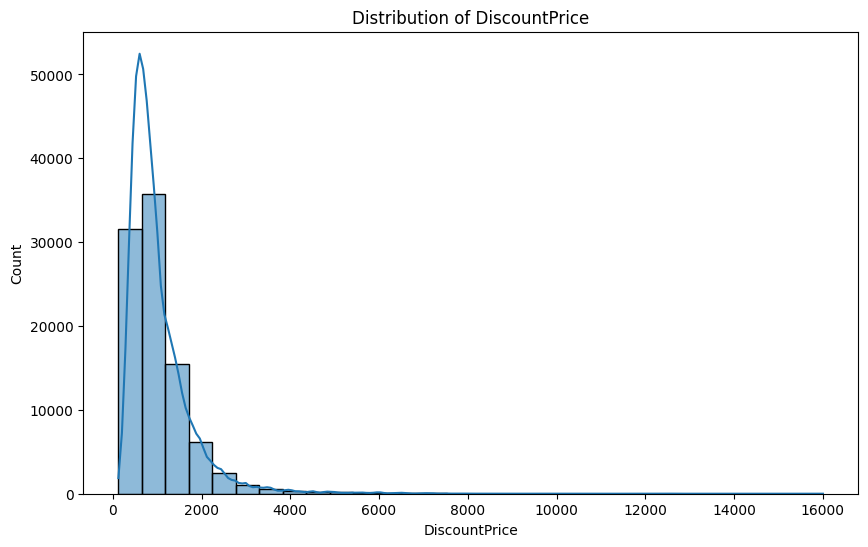

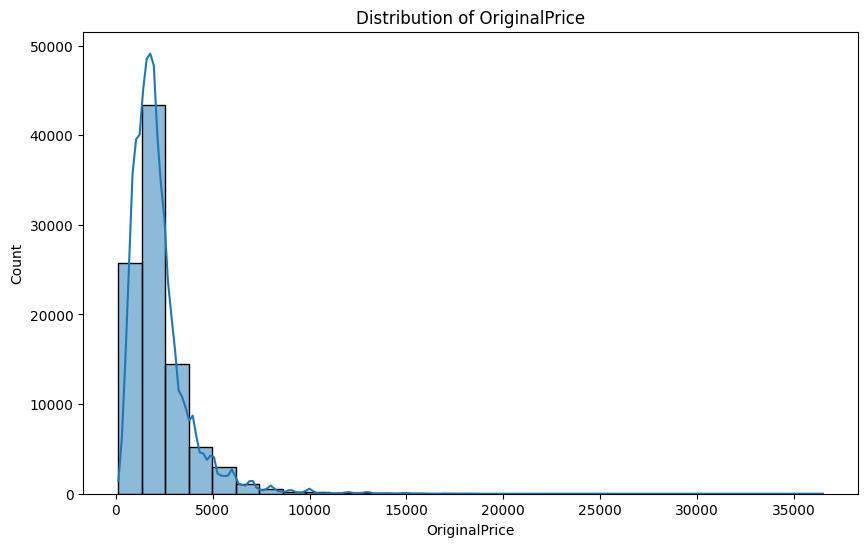

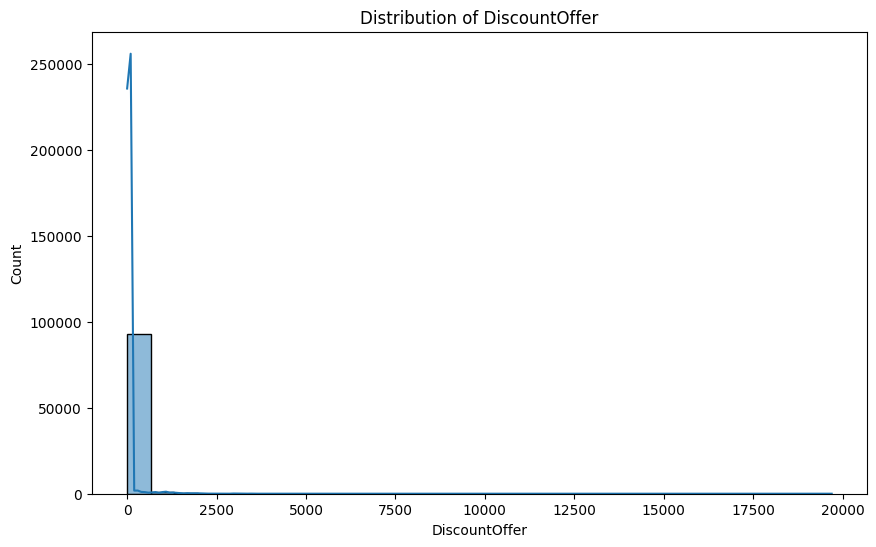

In [54]:
#numerical_features = ['DiscountPrice', 'OriginalPrice', 'Ratings', 'Reviews', 'DiscountOffer'] 
for feature in numerical_features:
  plt.figure(figsize=(10, 6))
  sns.histplot(tfidf_matrix[feature], bins=30, kde=True)
  plt.title(f'Distribution of {feature}')
  plt.show() 

In [56]:
def impute_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df[column].median()
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = median_value
    return df

# Imputing outliers in multiple columns
columns = ['DiscountPrice', 'OriginalPrice', 'DiscountOffer']
for column in columns:
    df = impute_outliers(tfidf_matrix, column)

print(f"Number of rows after imputing outliers: {len(df)}")


Number of rows after imputing outliers: 94032


In [57]:
tfidf_matrix[numerical_features].describe() 

,DiscountPrice,OriginalPrice,DiscountOffer
count,94032.000000,94032.000000,94032.000000
mean,900.271418,1920.109048,51.300174
std,436.411712,875.570648,16.116742
min,127.000000,129.000000,3.000000
25%,584.000000,1299.000000,40.000000
50%,824.000000,1899.000000,55.000000
75%,1124.000000,2399.000000,63.000000
max,2271.000000,4549.000000,102.000000


In [58]:
tfidf_matrix.shape

(94032, 51)

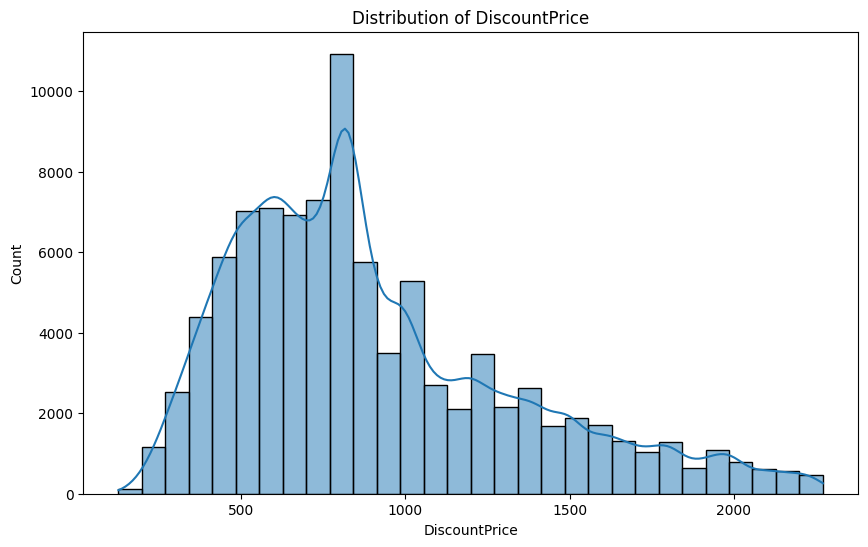

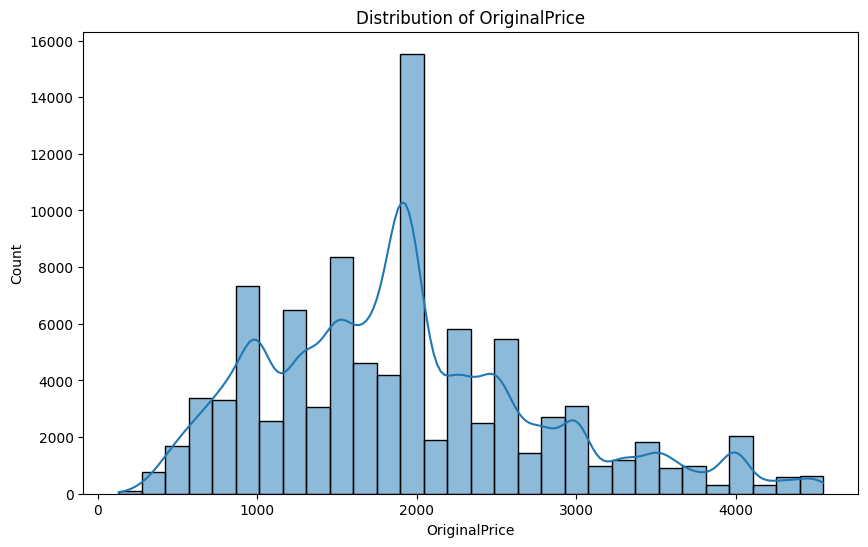

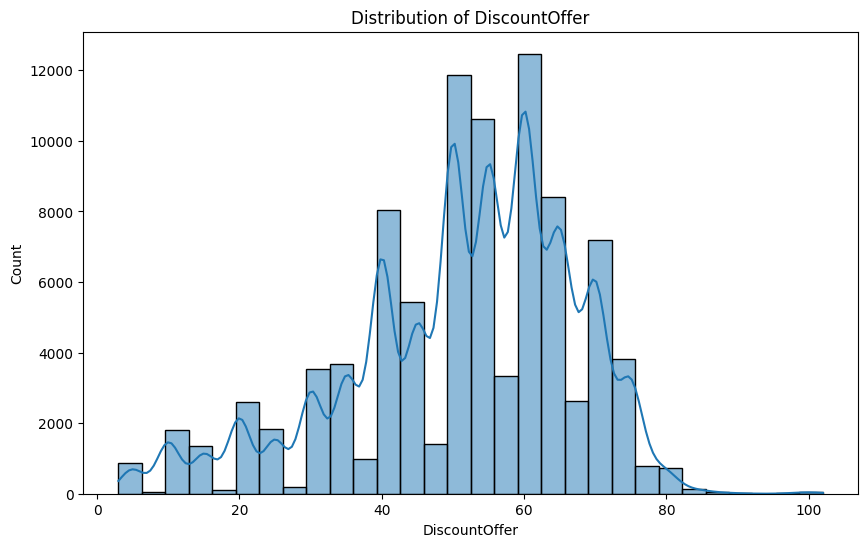

In [59]:
for feature in numerical_features:
  plt.figure(figsize=(10, 6))
  sns.histplot(tfidf_matrix[feature], bins=30, kde=True)
  plt.title(f'Distribution of {feature}')
  plt.show()

In [78]:
tfidf_matrix.to_csv("tfidf_matrix_no_outliers.csv", index=False) 

In [60]:
# Transform to a sparse matrix
tfidf_sparse = csr_matrix(tfidf_matrix)

In [61]:
# Use NearestNeighbors for approximate nearest neighbors
nn = NearestNeighbors(metric='cosine', algorithm='brute')
nn.fit(tfidf_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [62]:
def get_recommendations(item_index, model, data, n_neighbors=10):
    distances, indices = model.kneighbors(data[item_index], n_neighbors=n_neighbors)
    return indices.flatten(), distances.flatten() 

In [63]:
tfidf_sparse.shape

(94032, 51)

In [64]:
recommendations_no_outliers = {}

for idx in range(tfidf_sparse.shape[0]):
    recommended_indices, _ = get_recommendations(idx, nn, tfidf_sparse)
    recommendations_no_outliers[idx] = recommended_indices[1:]  


In [65]:
len(recommendations_no_outliers)

94032

In [66]:
import pickle

In [67]:
# Save the recommendations dictionary to a file
with open('recommendations_no_outliers.pkl', 'wb') as f:
    pickle.dump(recommendations_no_outliers, f)

print("Recommendations saved successfully.")


Recommendations saved successfully.


In [75]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


In [73]:
# Function to calculate cosine similarity between a product and its recommended items
def calculate_cosine_similarity(tfidf_matrix, product_id, recommended_indices):
    product_index = tfidf_matrix.index.get_loc(product_id)
    product_vector = tfidf_matrix.iloc[product_index].values.reshape(1, -1)
    recommended_vectors = tfidf_matrix.iloc[recommended_indices].values
    
    # Compute cosine similarity
    similarities = cosine_similarity(product_vector, recommended_vectors)[0]
    return similarities
    
# Function to calculate average cosine similarity for all products
def average_cosine_similarity(tfidf_matrix, recommendations):
    total_similarity = 0
    count = 0
    
    for product_id, recommended_indices in recommendations.items():
        similarities = calculate_cosine_similarity(tfidf_matrix, product_id, recommended_indices[1:])
        total_similarity += similarities.sum()
        count += len(similarities)
    
    return total_similarity / count if count != 0 else 0
# Function to calculate average intra-list similarity for all products
def average_intra_list_similarity(tfidf_matrix, recommendations):
    total_similarity = 0
    count = 0
    
    for recommended_indices in recommendations.values():
        total_similarity += intra_list_similarity(tfidf_matrix, recommended_indices)
        count += 1
    
    return total_similarity / count if count != 0 else 0


In [68]:
# Function to partition the recommendations dictionary into N groups
def partition_recommendations(recommendations, num_groups):
    keys = list(recommendations_no_outliers.keys())
    group_size = len(keys) // num_groups
    remainder = len(keys) % num_groups
    
    groups = []
    start = 0
    
    for i in range(num_groups):
        end = start + group_size + (1 if i < remainder else 0)
        group_keys = keys[start:end]
        group_recommendations = {key: recommendations_no_outliers[key] for key in group_keys}
        groups.append(group_recommendations)
        start = end
    
    return groups


In [69]:
# Function to calculate the average metrics for a group of recommendations
def average_metrics_for_group(tfidf_matrix, group_recommendations):
    avg_cosine_similarity = average_cosine_similarity(tfidf_matrix, group_recommendations)
    avg_intra_list_similarity = average_intra_list_similarity(tfidf_matrix, group_recommendations)
    return avg_cosine_similarity, avg_intra_list_similarity


In [71]:
# Partition the recommendations into 25 groups
num_groups = 25
recommendation_groups = partition_recommendations(recommendations_no_outliers, num_groups)


In [ ]:
# Calculate average metrics for each group
average_cosine_similarities = []
average_intra_list_similarities = []

for group in recommendation_groups:
    avg_cos_sim, avg_intra_sim = average_metrics_for_group(tfidf_matrix, group)
    average_cosine_similarities.append(avg_cos_sim)
    average_intra_list_similarities.append(avg_intra_sim)
